**Set Environment**

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


**Check file size before import**

In [2]:
fpath = "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX*_Dex/chr17.bed"
system(paste("ls -lh", fpath), intern=TRUE)

[1] "-rw-r--r--. 1 kk319 root 19G Jul 19 01:12 /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/chr17.bed"
[2] "-rw-r--r--. 1 kk319 root 12G Jul 19 01:25 /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/chr17.bed"
[3] "-rw-r--r--. 1 kk319 root 16G Jul 19 01:41 /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_Dex/chr17.bed"
[4] "-rw-r--r--. 1 kk319 root 19G Jul 19 01:58 /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_Dex/chr17.bed"
[5] "-rw-r--r--. 1 kk319 root 59G Jul 19 02:55 /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_Dex/chr17.bed"

```
- 59G /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_Dex/chr17.bed
- 19G /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/chr17.bed
- 12G /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/chr17.bed
- 16G /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_Dex/chr17.bed
- 19G /work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_Dex/chr17.bed
```

## Import motif annotation data of chr17

In [3]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(), col_character(),
           col_double(), col_integer())
cnames = c("Chrom_Frag",  "Start_Frag",  "End_Frag",  "Count_Frag", 
           "Chrom_Motif", "Start_Motif", "End_Motif", "Motif", "Score", 
           "Overlap")

fpath = "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/chr17.bed"
dat_ann_dex2 = read_tsv(fpath, col_types=ctypes, col_names=cnames)

In [4]:
head(dat_ann_dex2)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_Motif,Start_Motif,End_Motif,Motif,Score,Overlap
chr17,83638,84547,1,chr17,83629,83643,ZKSCAN1,7.7190,5
chr17,83638,84547,1,chr17,83652,83659,DMRT3,8.8098,7
chr17,83638,84547,1,chr17,83663,83682,ZNF324,8.5382,19
chr17,83638,84547,1,chr17,83673,83682,SREBF1,7.7626,9
chr17,83638,84547,1,chr17,83678,83701,ZNF436,6.9669,23
chr17,83638,84547,1,chr17,83679,83697,REST/NRSF,4.6434,18


In [5]:
dat_dex = dat_ann_dex2
dat_dex = dat_dex %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag) %>% 
    summarize(
        Count_Motif  = n(),
        Weight_Motif = sum(Score)) 
dat_dex = dat_dex %>% mutate(
    Len_Frag =  End_Frag - Start_Frag,
    Loc      = (End_Frag + Start_Frag)/2)
head(dat_dex)

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Count_Motif,Weight_Motif,Len_Frag,Loc
chr17,83638,84547,1,158,1302.487,909,84092.5
chr17,92503,93508,1,147,1130.224,1005,93005.5
chr17,152590,153715,1,299,2473.663,1125,153152.5
chr17,159027,160041,1,187,1509.554,1014,159534.0
chr17,173500,174429,1,151,1215.483,929,173964.5
chr17,174388,175345,1,172,1380.984,957,174866.5


In [7]:
dat = dat_dex
txt = "Chr17; Dex (TFX2_Dex)"

gp1 = ggplot(dat, aes(x=Len_Frag, y=Count_Motif)) + 
    geom_hex() + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Number of Motifs", title=txt)

gp2 = ggplot(dat, aes(x=Len_Frag, y=Weight_Motif)) + 
    geom_hex() +
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Weight of Motifs", title=txt)

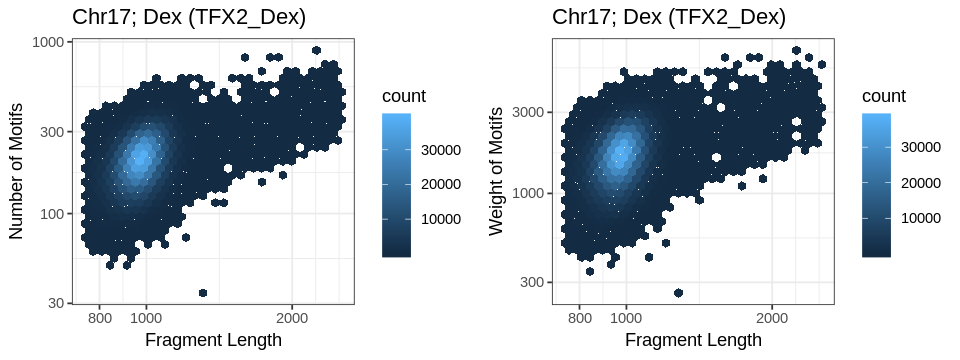

In [8]:
options(repr.plot.height=3, repr.plot.width=8)
grid.arrange(gp1, gp2, ncol=2)

In [11]:
dat = dat_dex
txt = "Chr17; Dex (TFX2_Dex)"

gp1 = ggplot(dat, aes(x=Count_Frag, y=Count_Motif, group=Count_Frag)) + 
    geom_boxplot(outlier.size = 0.1) + 
    theme_bw() +
    labs(x="Fragment Count", y="Number of Motifs", title=txt)

gp2 = ggplot(dat, aes(x=Count_Frag, y=Weight_Motif, group=Count_Frag)) + 
    geom_boxplot(outlier.size = 0.1) + 
    theme_bw() +
    labs(x="Fragment Count", y="Weight of Motifs", title=txt)

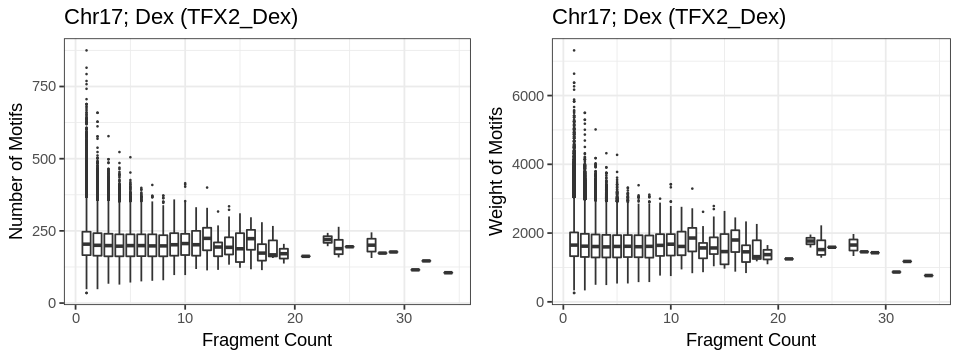

In [12]:
options(repr.plot.height=3, repr.plot.width=8)
grid.arrange(gp1, gp2, ncol=2)

## Fragment Length vs Number of Motif

In [4]:
dat_inp = dat_ann_inp1
dat_inp = dat_inp %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag) %>% 
    summarize(Count_Motif = n())
dat_inp = dat_inp %>% mutate(
    Len_Frag =  End_Frag - Start_Frag,
    Loc      = (End_Frag + Start_Frag)/2)
head(dat_inp)

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Count_Motif,Len_Frag,Loc
chr17,201123,201925,1,201,802,201524.0
chr17,201160,201968,1,211,808,201564.0
chr17,201202,202074,1,227,872,201638.0
chr17,201259,202052,1,214,793,201655.5
chr17,201366,202130,1,218,764,201748.0
chr17,206174,207307,1,203,1133,206740.5


In [10]:
dat = dat_inp
gp1 = ggplot(dat, aes(x=Len_Frag, y=Count_Motif)) + 
    geom_point(alpha = 0.5) + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Number of Motifs", title="Chr17; Input (Input1)")

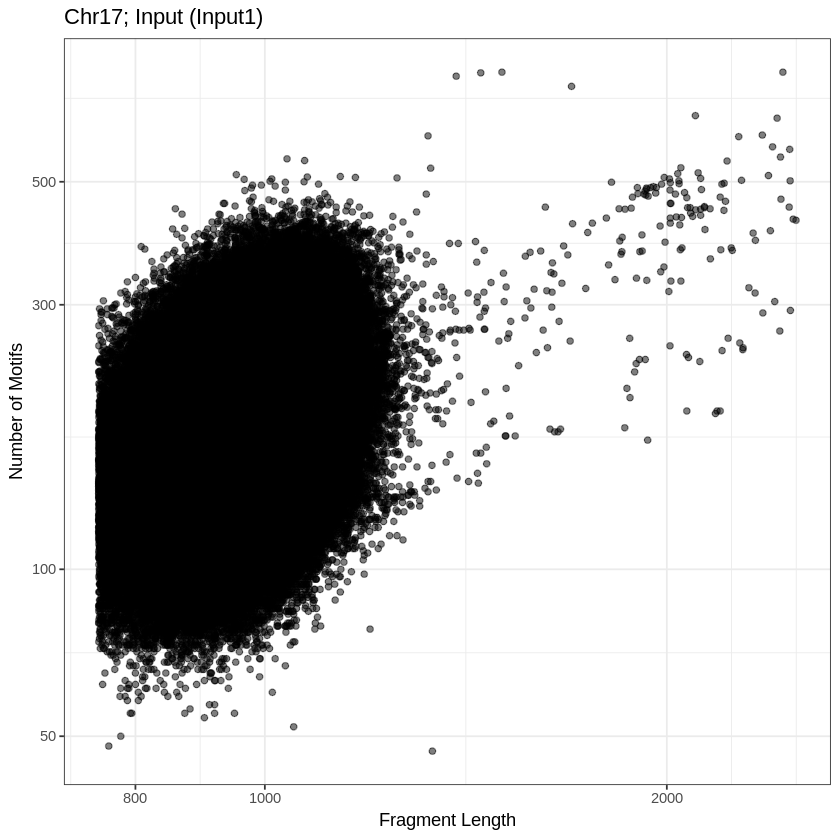

In [11]:
gp1

In [12]:
dat = dat_inp
gp2 = ggplot(dat, aes(x=Len_Frag, y=Count_Motif)) + 
    geom_hex() + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Number of Motifs", title="Chr17; Input (Input1)")

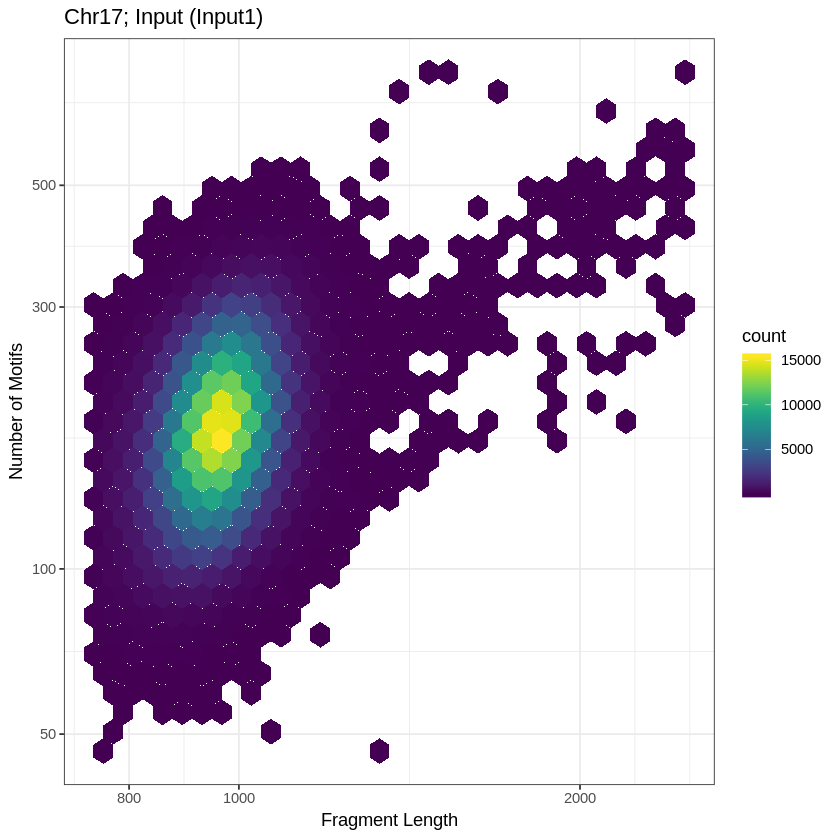

In [14]:
gp2 + scale_fill_viridis()